In [59]:
import pandas as pd;
df = pd.read_csv('reviews.csv',sep='|')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

import string 


def remove_punctuations(text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#df['text'] = df['text'].apply(remove_punctuations) #remove punctuations
#df['text'] = df['text'].str.replace('\d+', '') #remove nums
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.label[df['label'] == "negative"] = 0
df.label[df['label'] == "positive"] = 1
y = df['label']
y = y.astype('int')
test = df['text']

from sklearn.externals import joblib
vectorizer = joblib.load('vectortest2.sav')
#len(bow_transformer.vocabulary_)

testdata=df.iloc[4::5, :]

Xtest = testdata['text']
y_test = testdata['label']

traindata = df.drop(testdata.index)
Xtrain = traindata['text']
y_train = traindata['label']

X_train = vectorizer.transform(Xtrain)
X_test = vectorizer.transform(Xtest)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nihagajam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.8927200670108892


In [62]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[35486  4488]
 [ 4093 35920]]


             precision    recall  f1-score   support

          0       0.90      0.89      0.89     39974
          1       0.89      0.90      0.89     40013

avg / total       0.89      0.89      0.89     79987



In [126]:
# Compute ROC curve and ROC area for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_score = joblib.load('logRegModel2.sav').predict(X_test)

In [127]:
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds  = dict()

fpr, tpr, _ = roc_curve(y_test, y_score,pos_label=1)
roc_auc = auc(fpr, tpr)

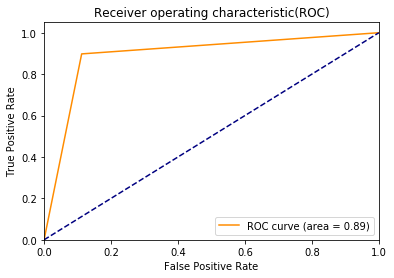

In [128]:
#print roc_auc_score(y_test, y_score)
plt.figure()
#plt.plot(fpr[0], tpr[0],color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

In [167]:
y_proba = joblib.load('logRegModel2.sav').predict_proba(X_test)

In [170]:
y_proba

array([[0.01180356, 0.98819644],
       [0.320465  , 0.679535  ],
       [0.95191254, 0.04808746],
       ...,
       [0.61841931, 0.38158069],
       [0.24616726, 0.75383274],
       [0.99283821, 0.00716179]])

In [168]:
import matplotlib.pyplot as plt
fpr= dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:,i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

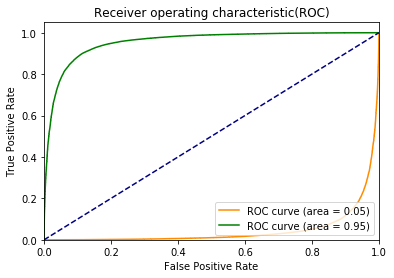

In [169]:
#print roc_auc_score(y_test, y_score)
plt.figure()
plt.plot(fpr[0], tpr[0],color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],color='green',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

In [162]:
y_df = joblib.load('logRegModel2.sav').decision_function(X_test)

In [163]:
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds  = dict()

fpr, tpr, _ = roc_curve(y_test, y_df,pos_label=1)
roc_auc = auc(fpr, tpr)

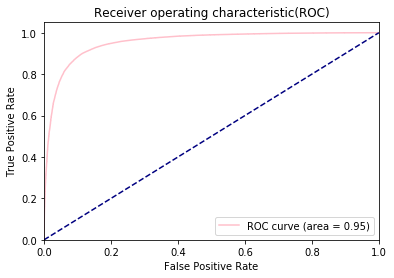

In [165]:
plt.figure()
plt.plot(fpr, tpr,color='pink',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()